# Basic Time Series Models - Lab

## Introduction

Now that you have an initial understanding of the the White Noise and the Random Walk model, let's try to generate some examples!

## Objectives

You will be able to:
- Explain what the goal is of time series modeling
- Understand and explain what a White Noise model is
- Understand and explain what a Random Walk model is
- Understand the mathematical formulations of Random Walk and White Noise models

## A White Noise Model

To get a good sense of how a model works, it is always a good idea to generate a process. Let's consider the following example:
- Every day in August, September and October 2018, Nina takes the subway to work. Let's ignore weekends for now and assume that Nina works every day.
- We know that on average, it takes her 25 minutes, and the standard deviation is 4 minutes. 
- Create and visualize a time series that reflects this information.

Let's import pandas, numpy and matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd
import statsmodels.api as sm


np.random.seed(12) # do not change this seed.

Create the dates. You can do this using `pd.date_range`, more info [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html).

In [2]:
dates = pd.date_range(start='8/1/2018', end='10/31/2018')

Generate the values for the wite noise process representing Nina's commute in August and September.

In [25]:
from random import gauss
from pandas import Series
from pandas.tools.plotting import autocorrelation_plot

# create white noise series
series = [gauss(25, 4.0) for i in dates]

Create a time series with the dates and the commute times.

In [26]:
ts = pd.Series(series, index=dates)

In [27]:
ts.tail()

2018-10-27    26.917393
2018-10-28    24.454693
2018-10-29    23.225577
2018-10-30    22.805781
2018-10-31    26.534760
Freq: D, dtype: float64

Visualize the time series and set appropriate axis labels.

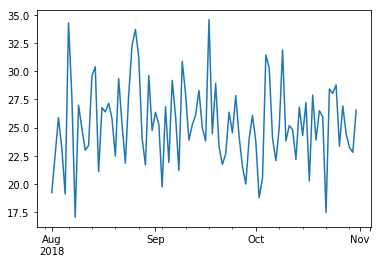

In [28]:
ts.plot()

Print Nina's shortest and longest commute.

In [29]:
np.min(ts)

17.040174917215438

In [30]:
np.max(ts)

34.566720784998054

Look at the distribution of commute times.

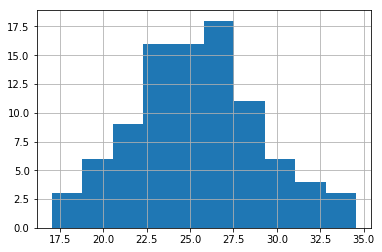

In [31]:
ts.hist()

Compute the standard deviation and the mean of the commute series. The fact that the mean and standard error are constant over time is crucial!

In [32]:
np.std(ts)

3.629690482661331

In [33]:
np.mean(ts)

25.35979408493218

Now, let's look at the mean and standard error for August and October respectively. 

In [34]:
ts.head()

2018-08-01    19.224950
2018-08-02    22.559036
2018-08-03    25.885020
2018-08-04    23.147158
2018-08-05    19.113395
Freq: D, dtype: float64

In [35]:
np.mean(ts['2018-08'])

25.762341887132585

In [36]:
np.mean(ts['2018-10'])

25.049144844125035

In [37]:
np.std(ts['2018-08'])

4.205124747660093

In [38]:
np.std(ts['2018-10'])

3.351241300587883

Because you've generated this data, you know that the mean and constant will be the same over time. But comparing mean and standard deviation over time is useful practice for real data examples to check if a process is White Noise!

## A Random Walk Model

Remember from the lecture that the Random Walk Model:

- Has no specified mean or variance
- Has a strong dependence over time

Mathematically, this can be written as:

$$Y_t = Y_{t-1} + \epsilon_t$$

Because today's value depends on yesterday's, you need a starting value when you start off your time series. In practice, this is what the first few time series values look like:
$$ Y_0 = \text{some specified starting value}$$
$$Y_1= Y_{0}+ \epsilon_1 $$
$$Y_2= Y_{1}+ \epsilon_2 = Y_{0} + \epsilon_1 + \epsilon_2  $$
$$Y_3= Y_{2}+ \epsilon_3 = Y_{0} + \epsilon_1 + \epsilon_2 + \epsilon_3 $$
$$\ldots $$

Keeping this in mind, let's create a random walk model:
- starting from a value of 1000 USD of a share value upon a company's first IPO (initial public offering) in 2010 until end of November of the same year, generate a random walk model with a white noise error term, which has a standard error of 10.

In [40]:
# keep the random seed
np.random.seed(11)

# create a series with the specified dates
dates = pd.date_range(start='2010-01-01', end='2018-11-30')
y0 = 1000
changes = np.random.normal(0,10,len(dates))
yt = y0 + np.cumsum(changes)
yt = pd.Series(yt, index=dates)
yt.head()

2010-01-01    1017.494547
2010-01-02    1014.633817
2010-01-03    1009.788166
2010-01-04     983.254981
2010-01-05     983.172134
Freq: D, dtype: float64

Visualize the time series with correct axis labels

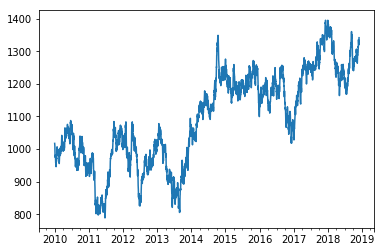

In [41]:
yt.plot()

You can see how this very much looks like the exchange rate series you looked at in the lecture!

## Random Walk with a Drift

Repeat the above, but include a drift parameter $c$ of 8 now!

In [43]:
# keep the random seed
np.random.seed(11)

# create a series with the specified dates
dates = pd.date_range(start='2010-01-01', end='2018-11-30')
y0 = 1000
c = 8
changes = np.random.normal(0,10,len(dates))
yt = y0 + np.array([x+c*i for i, x in enumerate(np.cumsum(changes))])
yt = pd.Series(yt, index=dates)
yt.head()

2010-01-01    1017.494547
2010-01-02    1022.633817
2010-01-03    1025.788166
2010-01-04    1007.254981
2010-01-05    1015.172134
Freq: D, dtype: float64

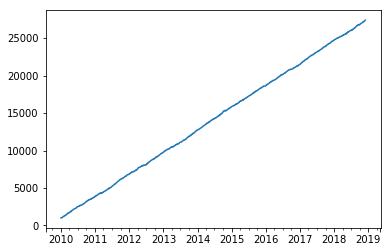

In [44]:
yt.plot()

Note that there is a very strong drift here!

## Differencing in a Random Walk model

One important property of the Random Walk model is that a differenced random walk returns a white noise. This is a result of the mathematical formula:

$$Y_t = Y_{t-1} + \epsilon_t$$
which is equivalent to
$$Y_t - Y_{t-1} = \epsilon_t$$

and we know that $\epsilon_t$ is a mean-zero white noise process! 

Plot the differenced time series for the shares time series (no drift).

In [45]:
# keep the random seed
np.random.seed(11)

# create a series with the specified dates
dates = pd.date_range(start='2010-01-01', end='2018-11-30')
y0 = 1000
changes = np.random.normal(0,10,len(dates))
yt = y0 + np.cumsum(changes)
yt = pd.Series(yt, index=dates)
yt.head()

2010-01-01    1017.494547
2010-01-02    1014.633817
2010-01-03    1009.788166
2010-01-04     983.254981
2010-01-05     983.172134
Freq: D, dtype: float64

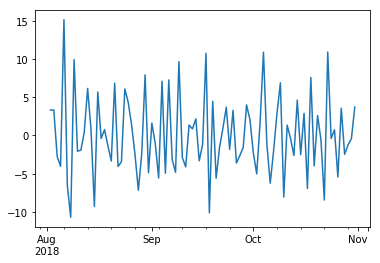

In [46]:
ts.diff().plot()

This does look a lot like a white noise series!

Plot the differenced time series for the shares time series (with a drift).

In [47]:
# keep the random seed
np.random.seed(11)

# create a series with the specified dates
dates = pd.date_range(start='2010-01-01', end='2018-11-30')
y0 = 1000
c = 8
changes = np.random.normal(0,10,len(dates))
yt = y0 + np.array([x+c*i for i, x in enumerate(np.cumsum(changes))])
yt = pd.Series(yt, index=dates)
yt.head()

2010-01-01    1017.494547
2010-01-02    1022.633817
2010-01-03    1025.788166
2010-01-04    1007.254981
2010-01-05    1015.172134
Freq: D, dtype: float64

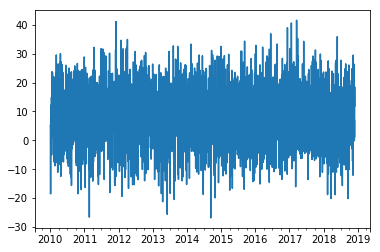

In [49]:
yt.diff().plot()

This is also a white noise series, but what can you tell about the mean?

The mean is equal to the drift $c$, so 8 for this example!

## Summary

Great, you now know how a Random Walk and Moving Average model work!